# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output. 





1. Construct adjacency matrix with the given data, assuming its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

<br>

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<br>


<br>

<font color='red'> Reading the csv file </font>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

# Task 1

In [47]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse
data=pd.read_csv('/content/drive/My Drive/recommender system/ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [5]:
data.shape

(89992, 3)

Check if the movie_ids and user_id are unique and continuous

In [8]:
items = np.sort(np.unique(data['item_id'].values))
for i,item in enumerate(items):
  if i != item:
    print('The items are not continuous from {} item number'.format(item))
    break

The items are not continuous from 710 item number


In [9]:
# Make each unique itme number as a unique index number so that each item can act as a column number in csr matrix
item_dict = {}
for i,x in enumerate(items):
    item_dict[str(x)] = i

df  = data

data['item_id'] = df['item_id'].apply(lambda val: item_dict[str(val)])

np.unique(data['item_id'].values)

array([   0,    1,    2, ..., 1659, 1660, 1661])

In [0]:
users = data['user_id']
items = data['item_id']
rating = data['rating']

In [15]:
# WE can check the number of unqiue items are equal to the item number
print(len(items))

89992


<font color='red'>Create your adjacency matrix </font>

In [0]:
from scipy.sparse import csr_matrix
adjacency_matrix = csr_matrix((rating ,(users,items))).toarray()

In [17]:
adjacency_matrix.shape

(943, 1662)

In [18]:
adjacency_matrix

array([[5, 0, 4, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
# Function to find optimal number of components explaining best variance
from sklearn.decomposition import TruncatedSVD

n_components = [10,20,50,100,200,400,700,1000]
explained_var = []
for c in n_components:
  svd = TruncatedSVD(n_components = c)
  svd.fit(adjacency_matrix)
  explained_var.append(svd.explained_variance_ratio_.sum())
  print("Explained variance by component {} is {}".format(c,svd.explained_variance_ratio_.sum()))


Explained variance by component 10 is 0.31409280534298295
Explained variance by component 20 is 0.37480740731981355
Explained variance by component 50 is 0.49244729188320946
Explained variance by component 100 is 0.6305473810070563
Explained variance by component 200 is 0.8011779458859315
Explained variance by component 400 is 0.9464278364366634
Explained variance by component 700 is 0.9960600458235814
Explained variance by component 1000 is 0.9999999999999998


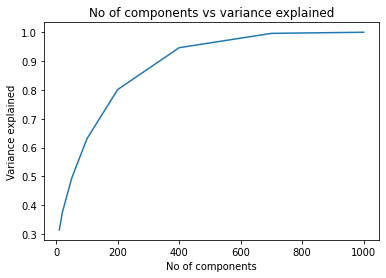

In [24]:
# plotting the explained variance vs the number of c0mponents
import matplotlib.pyplot as plt
plt.title('No of components vs variance explained')
plt.xlabel("No of components")
plt.ylabel("Variance explained")
plt.plot(n_components,explained_var)
plt.show()

In [0]:
#elbow point at 700 , so we will take 700

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [26]:
from sklearn.utils.extmath import randomized_svd
U, Sigma, V = randomized_svd(adjacency_matrix, n_components=700,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(V.T.shape)

(943, 700)
(700,)
(1662, 700)


<font color='red'>Compute mean of ratings</font>

In [0]:
def m_u(ratings):
  return ratings.mean()

In [28]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [0]:
def initialize(dim):
  lst = [0 for i in range(dim)]
  return lst 

In [35]:
dim= adjacency_matrix.shape[0]
B=initialize(dim)
print(len(B))

943


In [36]:
dim= adjacency_matrix.shape[1]
C=initialize(dim)
print(len(C))

1662


<font color='red'>Compute dL/db_i</font>

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

In [0]:
def derivative_db(rating,u,v,mu,b,c,reg):
    '''In this function, we will compute dL/db_i'''
    db_i = reg*2*b + -2*(rating - mu - b -c -np.dot(u,v))
    return db_i


<font color='red'>Compute dL/dc_j</font>

In [0]:
def derivative_dc(rating,u,v,mu,b,c,reg):
    '''In this function, we will compute dL/dc_j'''
    dc_j = reg*2*c + -2*(rating - mu - b -c -np.dot(u,v))
    return dc_j

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


In [0]:
def train(alpha,l_r):         #,users,items,ratings,B,C,U,V
  B = [0 for i in range(adjacency_matrix.shape[0])]
  C = [0 for i in range(adjacency_matrix.shape[1])]
  alpha = 0.1
  l_r = 0.001 
  errors = []
  rating_pred = np.zeros_like(adjacency_matrix)

  from tqdm import tqdm
  for epoch in tqdm(range(30)): 
    pred = []
    for i,j in zip(users,items): 
      pred_i_j = mu + B[i] + C[j] +np.dot(U[i],V.T[j])
      pred.append(pred_i_j)
      #B[i] = B[i] -l_r*2*(alpha*B[i] - adjacency_matrix[i][j] + mu + B[i] + C[j] + np.dot(U[i],V.T[j]))
      #C[j] = C[j] - l_r*2*(alpha*C[j] - adjacency_matrix[i][j] + mu + B[i] + C[j] + np.dot(U[i],V.T[j]))
      B[i] = B[i] - l_r*derivative_db(adjacency_matrix[i][j],U[i],V.T[j],mu,B[i], C[j] ,alpha)
      C[j] = C[j] - l_r*derivative_dc(adjacency_matrix[i][j],U[i],V.T[j],mu,B[i], C[j] ,alpha)

    epoch_mse = mse(rating, pred)
    print(epoch_mse)
    errors.append(epoch_mse)
     
  plt.title('Error per Epoch')
  plt.plot([x for x in range(30)],errors )

  return B,C,pred

  3%|▎         | 1/30 [00:02<01:01,  2.13s/it]

1.1288537570517614


  7%|▋         | 2/30 [00:04<00:57,  2.06s/it]

1.0129441071630292


 10%|█         | 3/30 [00:05<00:54,  2.02s/it]

0.9593515390159087


 13%|█▎        | 4/30 [00:07<00:50,  1.96s/it]

0.9281110501763041


 17%|█▋        | 5/30 [00:09<00:47,  1.90s/it]

0.9074234931358253


 20%|██        | 6/30 [00:11<00:45,  1.88s/it]

0.892570428973152


 23%|██▎       | 7/30 [00:13<00:43,  1.89s/it]

0.8813022545033398


 27%|██▋       | 8/30 [00:15<00:42,  1.91s/it]

0.8724117370974845


 30%|███       | 9/30 [00:17<00:39,  1.88s/it]

0.8651915396803073


 33%|███▎      | 10/30 [00:18<00:37,  1.86s/it]

0.8591978287196538


 37%|███▋      | 11/30 [00:20<00:34,  1.84s/it]

0.8541364113346974


 40%|████      | 12/30 [00:22<00:32,  1.82s/it]

0.8498033996865026


 43%|████▎     | 13/30 [00:24<00:30,  1.82s/it]

0.8460522313459506


 47%|████▋     | 14/30 [00:26<00:29,  1.82s/it]

0.8427743180036186


 50%|█████     | 15/30 [00:27<00:27,  1.81s/it]

0.8398871530133855


 53%|█████▎    | 16/30 [00:29<00:25,  1.81s/it]

0.837326705159629


 57%|█████▋    | 17/30 [00:31<00:23,  1.84s/it]

0.8350423821470414


 60%|██████    | 18/30 [00:33<00:22,  1.84s/it]

0.8329935930435255


 63%|██████▎   | 19/30 [00:35<00:20,  1.84s/it]

0.8311473388108777


 67%|██████▋   | 20/30 [00:37<00:18,  1.82s/it]

0.8294764834055168


 70%|███████   | 21/30 [00:38<00:16,  1.82s/it]

0.8279584872624611


 73%|███████▎  | 22/30 [00:40<00:14,  1.86s/it]

0.8265744623252889


 77%|███████▋  | 23/30 [00:42<00:12,  1.84s/it]

0.8253084554095758


 80%|████████  | 24/30 [00:44<00:10,  1.83s/it]

0.8241468967911485


 83%|████████▎ | 25/30 [00:46<00:09,  1.82s/it]

0.823078170400001


 87%|████████▋ | 26/30 [00:48<00:07,  1.84s/it]

0.8220922748976052


 90%|█████████ | 27/30 [00:49<00:05,  1.83s/it]

0.821180553623105


 93%|█████████▎| 28/30 [00:51<00:03,  1.82s/it]

0.8203354773832864


 97%|█████████▋| 29/30 [00:53<00:01,  1.82s/it]

0.8195504682520804


100%|██████████| 30/30 [00:55<00:00,  1.84s/it]

0.8188197555245633


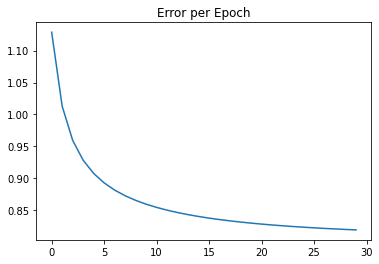

In [85]:
B,C,pred = train(alpha =0.1, l_r=0.001)

In [0]:
final_predicted_ratings = np.zeros_like(adjacency_matrix)
for i in range(adjacency_matrix.shape[0]):
  for j in range(adjacency_matrix.shape[1]):
    final_predicted_ratings[i][j] = mu + B[i] + C[j] +np.dot(U[i],V.T[j])

In [87]:
final_predicted_ratings

array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 2, 2, ..., 2, 2, 2],
       ...,
       [4, 3, 3, ..., 3, 3, 3],
       [4, 3, 3, ..., 3, 3, 3],
       [3, 3, 2, ..., 3, 3, 3]], dtype=int64)

In [90]:
pd.DataFrame({"Actual Ratings": rating, 'Predicted Ratings': pred})

,Actual Ratings,Predicted Ratings
0,3,2.968503
1,5,3.977159
2,4,3.782042
3,4,3.635830
4,5,4.165723
...,...,...
89987,4,3.569306
89988,3,2.723069
89989,2,3.257308
89990,5,4.512754


<font color='red'> Task 2</font>

In [0]:
import time
user_info = pd.read_csv('/content/drive/My Drive/recommender system/user_info.csv.txt')

In [54]:
user_info.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [59]:
user_info.shape

(943, 4)

### For finding out the relation between the user behaviou and gender we can train our model on any model say logistic regression

In [0]:
from sklearn.model_selection import train_test_split
x = np.hstack((user_info['age'].values.reshape(-1,1) , U))
y = user_info['is_male'].values

### Trying predicting without standardizing 

In [0]:
from sklearn.linear_model import LogisticRegression

In [134]:
model= LogisticRegression(C = 1)
model.fit(x,y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predicted_y = model.predict(x)

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [137]:
accuracy_score(y, predicted_y)

0.7104984093319194

In [138]:
confusion_matrix(y, predicted_y)

array([[  0, 273],
       [  0, 670]])

In [0]:
# We can see it is predicting only the majority points

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [0]:
x = sc.fit_transform(x)

In [142]:
model = LogisticRegression()
model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = model.predict(x)

In [146]:
accuracy_score(y,y_pred)

1.0

In [148]:
confusion_matrix(y,y_pred)

array([[273,   0],
       [  0, 670]])

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
model = DecisionTreeClassifier()
model.fit(x,y)  # Although Decision tree doesnt require scaling
confusion_matrix(y,model.predict(x))

array([[273,   0],
       [  0, 670]])